## Basic Operations with 1D and 2D Numpy Arrays

In [1]:
import numpy as np

In [6]:
arr_1d = np.array([1, 2, 3, 4, 5])
arr_2d = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

def array_operations():
    global arr_1d, arr_2d
    print("1D Array: ", arr_1d)
    print("2D Array: ", arr_2d)

    # Basic array operations
    print("Sum of 1D Array: ", np.sum(arr_1d))
    print("Mean of 2D Array: ", np.mean(arr_2d))
    print("Transpose of 2D Array: ", arr_2d.T)

array_operations()


1D Array:  [1 2 3 4 5]
2D Array:  [[1 2 3]
 [4 5 6]
 [7 8 9]]
Sum of 1D Array:  15
Mean of 2D Array:  5.0
Transpose of 2D Array:  [[1 4 7]
 [2 5 8]
 [3 6 9]]


## Image Processing with NumPy (Indexing and Slicing in Action)

In [ ]:
def process_image():
    # Creating a grayscale image using a 2D NumPy Array
    image = np.random.randint(0, 256, (5, 5), dtype=np.uint8)
    print("Original Image: \n", image)

    # Slicing a portion of the image
    cropped = image[1:4, 1:4]
    print("Cropped Image: \n", cropped)

    # Inverting colors
    inverted_image = 255 - image
    print("Inverted Image: \n", inverted_image)

    return image, cropped, inverted_image

# Call the function and store the results
image, cropped, inverted_image = process_image()

Original Image: 
 [[ 30 236  83  45  10]
 [ 29 155  46 230 244]
 [246 100  92 116 155]
 [223  48  16  49 239]
 [103  87 229 157 233]]
Cropped Image: 
 [[155  46 230]
 [100  92 116]
 [ 48  16  49]]
Inverted Image: 
 [[225  19 172 210 245]
 [226 100 209  25  11]
 [  9 155 163 139 100]
 [ 32 207 239 206  16]
 [152 168  26  98  22]]


## Augmented Reality Transformation
### Perform linear algebra operations like scaling rotation, and translation.

In [1]:
import numpy as np
import cv2

# Load an image
image = cv2.imread("images/image.jpg")
if image is None:
    print("Error: No image found")
    exit()

# Scaling Transformation
def scale_image(image, scale_factor):
    # Create the scaling matrix
    scaling_matrix = np.array([[scale_factor, 0, 0],
                                [0, scale_factor, 0],
                                [0, 0, 1]])
    # Get the dimensions of the image
    rows, cols = image.shape[:2]

    # Apply the scaling transformation
    scaled_image = cv2.warpPerspective(image, scaling_matrix, (cols, rows))
    return scaled_image

# Rotation Transformation
def rotate_image(image, angle):
    # Get the dimensions of the image
    rows, cols = image.shape[:2]

    # Calculate the rotation matrix
    rotation_matrix = cv2.getRotationMatrix2D((cols/2, rows/2), angle, 1)

    # Apply the rotation transformation
    rotated_image = cv2.warpAffine(image, rotation_matrix, (cols, rows))
    return rotated_image

# Translation Transformation
def translate_image(image, tx, ty):
    # Define the translation matrix
    translation_matrix = np.array([[1, 0, tx],
                                   [0, 1, ty],
                                   [0, 0, 1]], dtype=np.float32)
    
    # Get the dimensions of the image
    rows, cols = image.shape[:2]

    # Apply the translation transformation
    translated_image = cv2.warpPerspective(image, translation_matrix, (cols, rows))
    return translated_image

# Apply the transformations
scaled_image = scale_image(image, 0.5)
rotated_image = rotate_image(image, 45)
translated_image = translate_image(image, 50, 30)

# Show the results
cv2.imshow("Original", image)
cv2.imshow("Scaled", scaled_image)
cv2.imshow("Rotated", rotated_image)
cv2.imshow("Translated", translated_image)

cv2.waitKey(0)
cv2.destroyAllWindows()

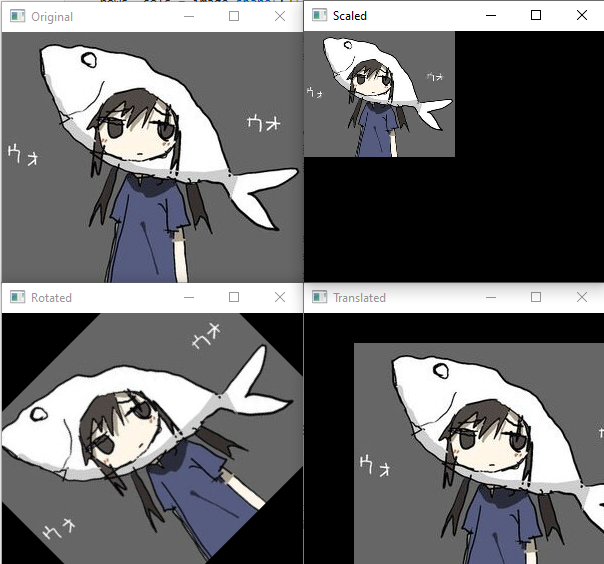

## Face Detection from Image Arrays
### Extract facial features by slicing a NumPy-based image array.

In [5]:
import cv2

# Load an image and convert it to a NumPy array
image = cv2.imread("images/face_image.png")
if image is None:
    print("Error: No image found")
    exit()
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Load OpenCV's pre-trained Haar Cascade model
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

# Detect faces in the image
faces = face_cascade.detectMultiScale(image_gray, scaleFactor=1.1, minNeighbors=5)

# Loop through the detected faces and extract facial features
for (x, y, w, h) in faces:
     # Slice the image array to extract the face region 
    face_region = image[y:y+h, x:x+w] 
     
    # Display the face region 
    cv2.imshow('Face Region', face_region) 
     
    # Extract additional facial features if required (e.g., eyes, nose) 
    eyes_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml') 
    eyes = eyes_cascade.detectMultiScale(face_region, scaleFactor=1.1, minNeighbors=5) 
     
    for (ex, ey, ew, eh) in eyes: 
        eye_region = face_region[ey:ey+eh, ex:ex+ew] 
        cv2.imshow('Eye Region', eye_region) 
 
# Show the original image with detected faces 
cv2.imshow('Detected Faces', image) 
 
cv2.waitKey(0) 
cv2.destroyAllWindows()

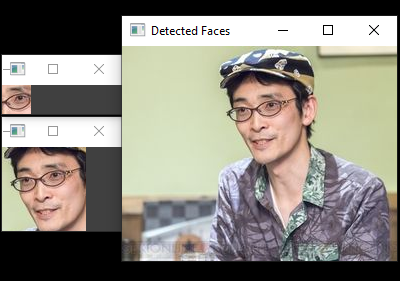